In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline


In [2]:
import tensorflow
print (tensorflow.__version__)

2.3.1


Training data shapes: X=(60000, 28, 28), y=(60000,)
Testing data shapes: X=(10000, 28, 28), y=(10000,)


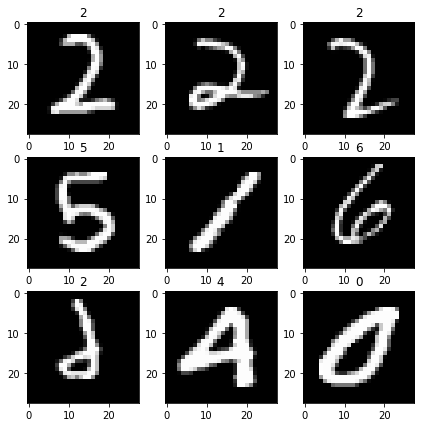

In [3]:
from tensorflow.keras.datasets import mnist

(trainX, trainY), (testX, testY) = mnist.load_data()

print('Training data shapes: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Testing data shapes: X=%s, y=%s' % (testX.shape, testY.shape))

plt.figure(figsize=(7, 7))
for j in range(9):
    i = np.random.randint(0, 10000)
    plt.subplot(330 + 1 + j)
    plt.imshow(trainX[i], cmap='gray')
    plt.title(trainY[i])
plt.show()

In [4]:
trainX = [image/255.0 for image in trainX]
testX = [image/255.0 for image in testX]

trainX = np.reshape(trainX, (60000, 28, 28, 1))
testX = np.reshape(testX, (10000, 28, 28, 1))

print (trainX.shape, testX.shape, trainY.shape, testY.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


# Generator Model

In [8]:
random_input = tensorflow.keras.layers.Input(shape = 50)

x = tensorflow.keras.layers.Dense(512, activation='relu')(random_input)
x = tensorflow.keras.layers.Dense(28*28)(x)
x = tensorflow.keras.layers.Reshape((28, 28, 1))(x)

generated_image = tensorflow.keras.layers.Activation('sigmoid')(x)

generator_network = tensorflow.keras.models.Model(inputs=random_input, outputs=generated_image)
generator_network.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               26112     
_________________________________________________________________
dense_7 (Dense)              (None, 784)               402192    
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
activation_3 (Activation)    (None, 28, 28, 1)         0         
Total params: 428,304
Trainable params: 428,304
Non-trainable params: 0
_________________________________________________________________


# Discriminator

In [9]:
image_input = tensorflow.keras.layers.Input(shape=(28, 28, 1))

x = tensorflow.keras.layers.Flatten()(image_input)
x = tensorflow.keras.layers.Dense(128)(x)
x = tensorflow.keras.layers.Dense(1)(x)

real_vs_fake_output = tensorflow.keras.layers.Activation('sigmoid')(x)

discriminator_network = tensorflow.keras.models.Model(inputs=image_input, outputs=real_vs_fake_output)
discriminator_network.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


In [10]:
adam_optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5)
discriminator_network.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# GAN

In [11]:
discriminator_network.trainable=False

gan_input = generator_network(random_input)
gan_output = discriminator_network(gan_input)

gan_model = tensorflow.keras.models.Model(random_input, gan_output)
gan_model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
functional_7 (Functional)    (None, 28, 28, 1)         428304    
_________________________________________________________________
functional_9 (Functional)    (None, 1)                 100609    
Total params: 528,913
Trainable params: 428,304
Non-trainable params: 100,609
_________________________________________________________________


# Compiling Models

In [12]:
gan_model.compile(loss='binary_crossentropy', optimizer=adam_optimizer)

# Define Data Generators

In [13]:
# Indices of Zero Images
#indices = list(np.where(trainY==0)[0])
indices = [i for i in range(60000)]

def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

def get_fake_samples(generator_network, batch_size, noise_size):
    random_noise_batch = get_random_noise(batch_size, noise_size) 
    fake_samples = generator_network.predict_on_batch(random_noise_batch)
    return fake_samples

def get_real_samples(batch_size):
    random_indices = np.random.choice(indices, size=batch_size)
    real_images = trainX[np.array(random_indices),:]
    return real_images

def show_generator_results(generator_network):
    fake_samples = get_fake_samples(generator_network, 10, noise_size)

    plt.figure(figsize=(7, 7))
    for j in range(9):
        i = j
        plt.subplot(330 + 1 + j)
        plt.imshow(fake_samples[i,:,:,-1], cmap='gray')
    plt.show()
    return

# Training GAN

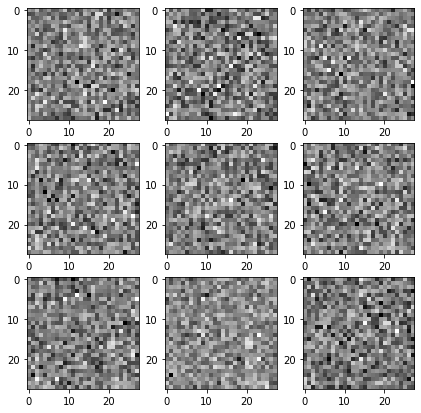

Epoch:0, Step:0, D-Loss:0.788, D-Acc:59.000, G-Loss:1.001
Epoch:0, Step:50, D-Loss:0.146, D-Acc:99.000, G-Loss:2.959
Epoch:0, Step:100, D-Loss:0.101, D-Acc:100.000, G-Loss:3.259
Epoch:0, Step:150, D-Loss:0.153, D-Acc:98.000, G-Loss:2.987
Epoch:0, Step:200, D-Loss:0.228, D-Acc:97.000, G-Loss:2.451
Epoch:0, Step:250, D-Loss:0.355, D-Acc:94.000, G-Loss:1.871
Epoch:0, Step:300, D-Loss:0.441, D-Acc:85.000, G-Loss:1.667
Epoch:0, Step:350, D-Loss:0.467, D-Acc:79.000, G-Loss:1.460
Epoch:0, Step:400, D-Loss:0.491, D-Acc:78.000, G-Loss:1.464
Epoch:0, Step:450, D-Loss:0.469, D-Acc:86.000, G-Loss:1.522
Epoch:1, Step:0, D-Loss:0.490, D-Acc:79.000, G-Loss:1.390
Epoch:1, Step:50, D-Loss:0.489, D-Acc:81.000, G-Loss:1.416
Epoch:1, Step:100, D-Loss:0.448, D-Acc:88.000, G-Loss:1.405
Epoch:1, Step:150, D-Loss:0.450, D-Acc:86.000, G-Loss:1.383
Epoch:1, Step:200, D-Loss:0.513, D-Acc:79.000, G-Loss:1.181
Epoch:1, Step:250, D-Loss:0.533, D-Acc:85.000, G-Loss:1.123
Epoch:1, Step:300, D-Loss:0.592, D-Acc:83.000

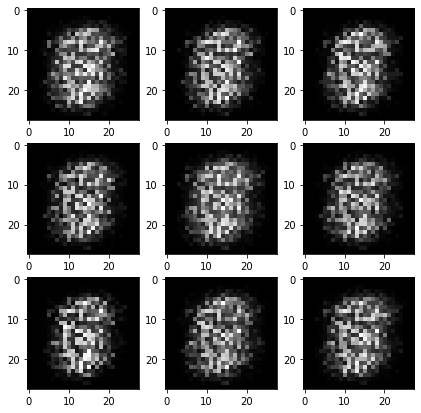

Epoch:5, Step:0, D-Loss:0.681, D-Acc:73.000, G-Loss:0.853
Epoch:5, Step:50, D-Loss:0.649, D-Acc:77.000, G-Loss:0.863
Epoch:5, Step:100, D-Loss:0.769, D-Acc:49.000, G-Loss:0.766
Epoch:5, Step:150, D-Loss:0.716, D-Acc:59.000, G-Loss:0.823
Epoch:5, Step:200, D-Loss:0.689, D-Acc:64.000, G-Loss:0.818
Epoch:5, Step:250, D-Loss:0.701, D-Acc:66.000, G-Loss:0.830
Epoch:5, Step:300, D-Loss:0.749, D-Acc:54.000, G-Loss:0.781
Epoch:5, Step:350, D-Loss:0.736, D-Acc:61.000, G-Loss:0.801
Epoch:5, Step:400, D-Loss:0.692, D-Acc:64.000, G-Loss:0.825
Epoch:5, Step:450, D-Loss:0.645, D-Acc:80.000, G-Loss:0.857
Epoch:6, Step:0, D-Loss:0.728, D-Acc:61.000, G-Loss:0.782
Epoch:6, Step:50, D-Loss:0.698, D-Acc:66.000, G-Loss:0.836
Epoch:6, Step:100, D-Loss:0.727, D-Acc:52.000, G-Loss:0.805
Epoch:6, Step:150, D-Loss:0.710, D-Acc:66.000, G-Loss:0.825
Epoch:6, Step:200, D-Loss:0.683, D-Acc:69.000, G-Loss:0.815
Epoch:6, Step:250, D-Loss:0.724, D-Acc:54.000, G-Loss:0.770
Epoch:6, Step:300, D-Loss:0.662, D-Acc:76.000,

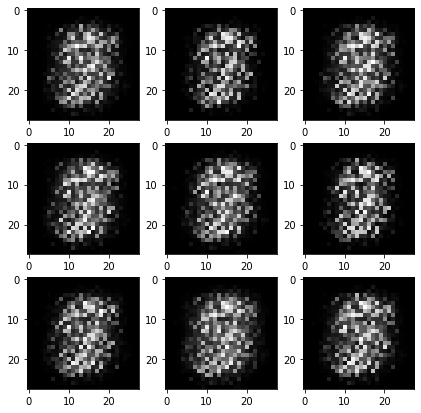

Epoch:10, Step:0, D-Loss:0.699, D-Acc:54.000, G-Loss:0.713
Epoch:10, Step:50, D-Loss:0.740, D-Acc:35.000, G-Loss:0.710
Epoch:10, Step:100, D-Loss:0.702, D-Acc:60.000, G-Loss:0.796
Epoch:10, Step:150, D-Loss:0.708, D-Acc:55.000, G-Loss:0.768
Epoch:10, Step:200, D-Loss:0.688, D-Acc:63.000, G-Loss:0.787
Epoch:10, Step:250, D-Loss:0.704, D-Acc:49.000, G-Loss:0.747
Epoch:10, Step:300, D-Loss:0.690, D-Acc:62.000, G-Loss:0.749
Epoch:10, Step:350, D-Loss:0.647, D-Acc:68.000, G-Loss:0.773
Epoch:10, Step:400, D-Loss:0.679, D-Acc:53.000, G-Loss:0.738
Epoch:10, Step:450, D-Loss:0.728, D-Acc:34.000, G-Loss:0.676
Epoch:11, Step:0, D-Loss:0.673, D-Acc:63.000, G-Loss:0.762
Epoch:11, Step:50, D-Loss:0.714, D-Acc:50.000, G-Loss:0.761
Epoch:11, Step:100, D-Loss:0.761, D-Acc:41.000, G-Loss:0.734
Epoch:11, Step:150, D-Loss:0.711, D-Acc:54.000, G-Loss:0.762
Epoch:11, Step:200, D-Loss:0.743, D-Acc:37.000, G-Loss:0.726
Epoch:11, Step:250, D-Loss:0.637, D-Acc:79.000, G-Loss:0.801
Epoch:11, Step:300, D-Loss:0.6

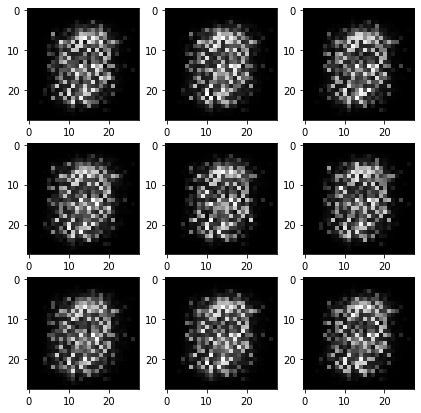

Epoch:15, Step:0, D-Loss:0.687, D-Acc:63.000, G-Loss:0.783
Epoch:15, Step:50, D-Loss:0.703, D-Acc:49.000, G-Loss:0.735
Epoch:15, Step:100, D-Loss:0.742, D-Acc:34.000, G-Loss:0.697
Epoch:15, Step:150, D-Loss:0.693, D-Acc:53.000, G-Loss:0.761
Epoch:15, Step:200, D-Loss:0.678, D-Acc:66.000, G-Loss:0.780
Epoch:15, Step:250, D-Loss:0.689, D-Acc:59.000, G-Loss:0.745
Epoch:15, Step:300, D-Loss:0.679, D-Acc:52.000, G-Loss:0.756
Epoch:15, Step:350, D-Loss:0.700, D-Acc:44.000, G-Loss:0.725
Epoch:15, Step:400, D-Loss:0.746, D-Acc:33.000, G-Loss:0.689
Epoch:15, Step:450, D-Loss:0.718, D-Acc:50.000, G-Loss:0.744
Epoch:16, Step:0, D-Loss:0.653, D-Acc:73.000, G-Loss:0.802
Epoch:16, Step:50, D-Loss:0.722, D-Acc:40.000, G-Loss:0.740
Epoch:16, Step:100, D-Loss:0.729, D-Acc:45.000, G-Loss:0.720
Epoch:16, Step:150, D-Loss:0.694, D-Acc:55.000, G-Loss:0.751
Epoch:16, Step:200, D-Loss:0.716, D-Acc:45.000, G-Loss:0.717
Epoch:16, Step:250, D-Loss:0.681, D-Acc:53.000, G-Loss:0.722
Epoch:16, Step:300, D-Loss:0.6

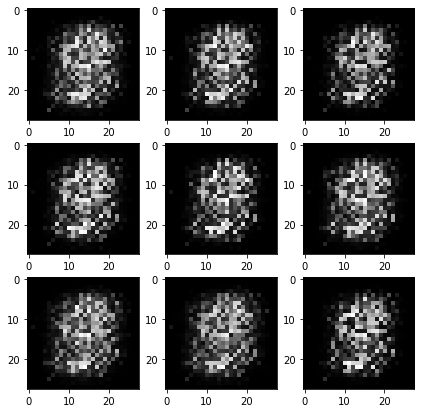

Epoch:20, Step:0, D-Loss:0.722, D-Acc:44.000, G-Loss:0.717
Epoch:20, Step:50, D-Loss:0.739, D-Acc:45.000, G-Loss:0.741
Epoch:20, Step:100, D-Loss:0.662, D-Acc:71.000, G-Loss:0.781
Epoch:20, Step:150, D-Loss:0.720, D-Acc:40.000, G-Loss:0.714
Epoch:20, Step:200, D-Loss:0.709, D-Acc:45.000, G-Loss:0.729
Epoch:20, Step:250, D-Loss:0.675, D-Acc:65.000, G-Loss:0.765
Epoch:20, Step:300, D-Loss:0.670, D-Acc:72.000, G-Loss:0.788
Epoch:20, Step:350, D-Loss:0.740, D-Acc:42.000, G-Loss:0.700
Epoch:20, Step:400, D-Loss:0.794, D-Acc:24.000, G-Loss:0.667
Epoch:20, Step:450, D-Loss:0.701, D-Acc:52.000, G-Loss:0.757
Epoch:21, Step:0, D-Loss:0.687, D-Acc:58.000, G-Loss:0.771
Epoch:21, Step:50, D-Loss:0.671, D-Acc:53.000, G-Loss:0.762
Epoch:21, Step:100, D-Loss:0.681, D-Acc:70.000, G-Loss:0.789
Epoch:21, Step:150, D-Loss:0.727, D-Acc:33.000, G-Loss:0.707
Epoch:21, Step:200, D-Loss:0.718, D-Acc:45.000, G-Loss:0.724
Epoch:21, Step:250, D-Loss:0.757, D-Acc:34.000, G-Loss:0.712
Epoch:21, Step:300, D-Loss:0.6

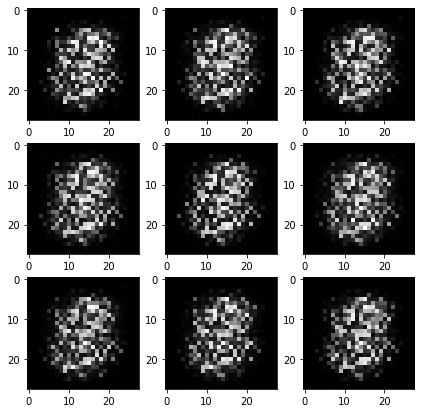

Epoch:25, Step:0, D-Loss:0.685, D-Acc:59.000, G-Loss:0.758
Epoch:25, Step:50, D-Loss:0.726, D-Acc:37.000, G-Loss:0.726
Epoch:25, Step:100, D-Loss:0.709, D-Acc:49.000, G-Loss:0.721
Epoch:25, Step:150, D-Loss:0.691, D-Acc:56.000, G-Loss:0.759
Epoch:25, Step:200, D-Loss:0.695, D-Acc:54.000, G-Loss:0.740
Epoch:25, Step:250, D-Loss:0.657, D-Acc:68.000, G-Loss:0.785
Epoch:25, Step:300, D-Loss:0.723, D-Acc:44.000, G-Loss:0.719
Epoch:25, Step:350, D-Loss:0.731, D-Acc:43.000, G-Loss:0.737
Epoch:25, Step:400, D-Loss:0.728, D-Acc:33.000, G-Loss:0.709
Epoch:25, Step:450, D-Loss:0.700, D-Acc:55.000, G-Loss:0.746
Epoch:26, Step:0, D-Loss:0.694, D-Acc:49.000, G-Loss:0.726
Epoch:26, Step:50, D-Loss:0.705, D-Acc:53.000, G-Loss:0.740
Epoch:26, Step:100, D-Loss:0.666, D-Acc:60.000, G-Loss:0.750
Epoch:26, Step:150, D-Loss:0.705, D-Acc:41.000, G-Loss:0.704
Epoch:26, Step:200, D-Loss:0.708, D-Acc:36.000, G-Loss:0.709
Epoch:26, Step:250, D-Loss:0.706, D-Acc:52.000, G-Loss:0.757
Epoch:26, Step:300, D-Loss:0.6

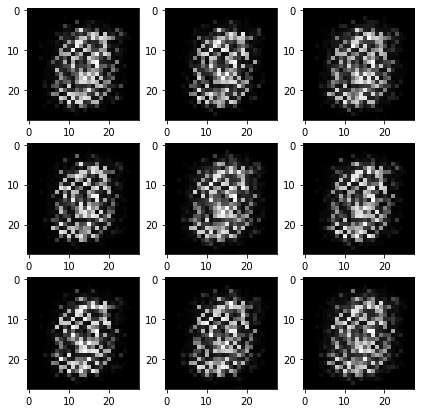

Epoch:30, Step:0, D-Loss:0.666, D-Acc:65.000, G-Loss:0.753
Epoch:30, Step:50, D-Loss:0.721, D-Acc:47.000, G-Loss:0.732
Epoch:30, Step:100, D-Loss:0.735, D-Acc:31.000, G-Loss:0.699
Epoch:30, Step:150, D-Loss:0.722, D-Acc:37.000, G-Loss:0.707
Epoch:30, Step:200, D-Loss:0.644, D-Acc:73.000, G-Loss:0.794
Epoch:30, Step:250, D-Loss:0.705, D-Acc:43.000, G-Loss:0.713
Epoch:30, Step:300, D-Loss:0.682, D-Acc:54.000, G-Loss:0.729
Epoch:30, Step:350, D-Loss:0.697, D-Acc:52.000, G-Loss:0.737
Epoch:30, Step:400, D-Loss:0.732, D-Acc:34.000, G-Loss:0.696
Epoch:30, Step:450, D-Loss:0.754, D-Acc:38.000, G-Loss:0.705
Epoch:31, Step:0, D-Loss:0.726, D-Acc:46.000, G-Loss:0.742
Epoch:31, Step:50, D-Loss:0.679, D-Acc:59.000, G-Loss:0.779
Epoch:31, Step:100, D-Loss:0.645, D-Acc:76.000, G-Loss:0.797
Epoch:31, Step:150, D-Loss:0.767, D-Acc:25.000, G-Loss:0.678
Epoch:31, Step:200, D-Loss:0.704, D-Acc:48.000, G-Loss:0.719
Epoch:31, Step:250, D-Loss:0.641, D-Acc:72.000, G-Loss:0.749
Epoch:31, Step:300, D-Loss:0.6

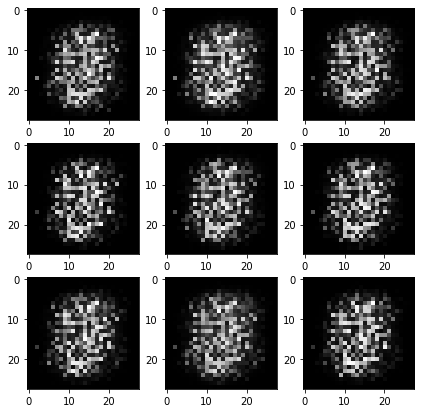

Epoch:35, Step:0, D-Loss:0.761, D-Acc:26.000, G-Loss:0.682
Epoch:35, Step:50, D-Loss:0.718, D-Acc:47.000, G-Loss:0.736
Epoch:35, Step:100, D-Loss:0.702, D-Acc:46.000, G-Loss:0.722
Epoch:35, Step:150, D-Loss:0.702, D-Acc:59.000, G-Loss:0.742
Epoch:35, Step:200, D-Loss:0.699, D-Acc:50.000, G-Loss:0.738
Epoch:35, Step:250, D-Loss:0.714, D-Acc:43.000, G-Loss:0.705
Epoch:35, Step:300, D-Loss:0.644, D-Acc:75.000, G-Loss:0.775
Epoch:35, Step:350, D-Loss:0.706, D-Acc:49.000, G-Loss:0.720
Epoch:35, Step:400, D-Loss:0.709, D-Acc:44.000, G-Loss:0.711
Epoch:35, Step:450, D-Loss:0.707, D-Acc:47.000, G-Loss:0.725
Epoch:36, Step:0, D-Loss:0.668, D-Acc:63.000, G-Loss:0.753
Epoch:36, Step:50, D-Loss:0.707, D-Acc:52.000, G-Loss:0.727
Epoch:36, Step:100, D-Loss:0.727, D-Acc:30.000, G-Loss:0.686
Epoch:36, Step:150, D-Loss:0.704, D-Acc:54.000, G-Loss:0.736
Epoch:36, Step:200, D-Loss:0.670, D-Acc:66.000, G-Loss:0.744
Epoch:36, Step:250, D-Loss:0.706, D-Acc:50.000, G-Loss:0.744
Epoch:36, Step:300, D-Loss:0.6

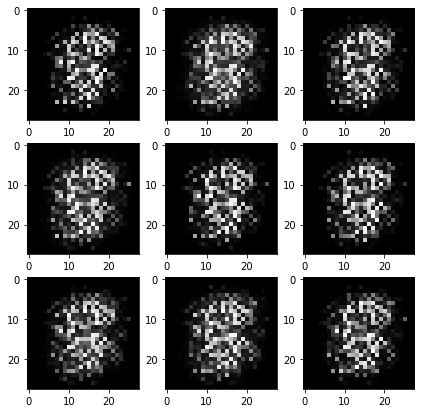

Epoch:40, Step:0, D-Loss:0.678, D-Acc:56.000, G-Loss:0.740
Epoch:40, Step:50, D-Loss:0.713, D-Acc:52.000, G-Loss:0.727
Epoch:40, Step:100, D-Loss:0.724, D-Acc:35.000, G-Loss:0.682
Epoch:40, Step:150, D-Loss:0.709, D-Acc:46.000, G-Loss:0.721
Epoch:40, Step:200, D-Loss:0.663, D-Acc:66.000, G-Loss:0.762
Epoch:40, Step:250, D-Loss:0.732, D-Acc:29.000, G-Loss:0.671
Epoch:40, Step:300, D-Loss:0.714, D-Acc:51.000, G-Loss:0.726
Epoch:40, Step:350, D-Loss:0.693, D-Acc:53.000, G-Loss:0.754
Epoch:40, Step:400, D-Loss:0.708, D-Acc:48.000, G-Loss:0.736
Epoch:40, Step:450, D-Loss:0.711, D-Acc:44.000, G-Loss:0.726
Epoch:41, Step:0, D-Loss:0.690, D-Acc:61.000, G-Loss:0.758
Epoch:41, Step:50, D-Loss:0.704, D-Acc:44.000, G-Loss:0.724
Epoch:41, Step:100, D-Loss:0.666, D-Acc:63.000, G-Loss:0.733
Epoch:41, Step:150, D-Loss:0.688, D-Acc:49.000, G-Loss:0.731
Epoch:41, Step:200, D-Loss:0.746, D-Acc:26.000, G-Loss:0.669
Epoch:41, Step:250, D-Loss:0.687, D-Acc:47.000, G-Loss:0.724
Epoch:41, Step:300, D-Loss:0.6

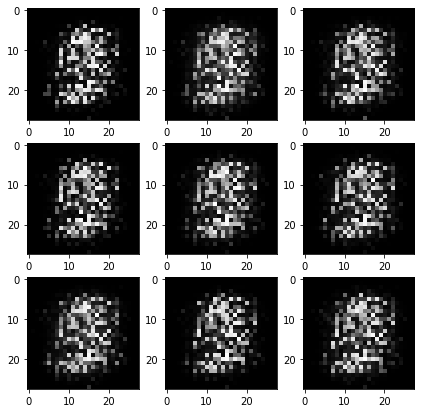

Epoch:45, Step:0, D-Loss:0.720, D-Acc:38.000, G-Loss:0.707
Epoch:45, Step:50, D-Loss:0.726, D-Acc:32.000, G-Loss:0.688
Epoch:45, Step:100, D-Loss:0.679, D-Acc:72.000, G-Loss:0.775
Epoch:45, Step:150, D-Loss:0.656, D-Acc:71.000, G-Loss:0.766
Epoch:45, Step:200, D-Loss:0.714, D-Acc:35.000, G-Loss:0.696
Epoch:45, Step:250, D-Loss:0.736, D-Acc:34.000, G-Loss:0.698
Epoch:45, Step:300, D-Loss:0.737, D-Acc:33.000, G-Loss:0.700
Epoch:45, Step:350, D-Loss:0.688, D-Acc:65.000, G-Loss:0.759
Epoch:45, Step:400, D-Loss:0.720, D-Acc:39.000, G-Loss:0.711
Epoch:45, Step:450, D-Loss:0.739, D-Acc:39.000, G-Loss:0.709
Epoch:46, Step:0, D-Loss:0.667, D-Acc:65.000, G-Loss:0.742
Epoch:46, Step:50, D-Loss:0.681, D-Acc:61.000, G-Loss:0.743
Epoch:46, Step:100, D-Loss:0.699, D-Acc:46.000, G-Loss:0.711
Epoch:46, Step:150, D-Loss:0.719, D-Acc:48.000, G-Loss:0.730
Epoch:46, Step:200, D-Loss:0.726, D-Acc:40.000, G-Loss:0.709
Epoch:46, Step:250, D-Loss:0.688, D-Acc:55.000, G-Loss:0.725
Epoch:46, Step:300, D-Loss:0.7

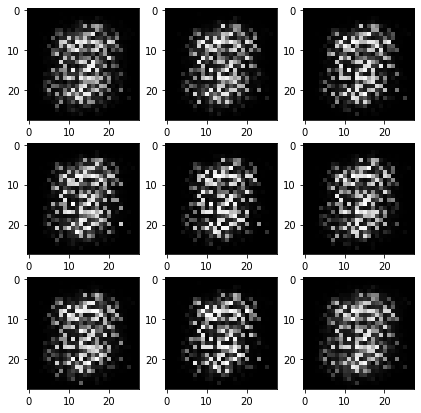

Epoch:50, Step:0, D-Loss:0.723, D-Acc:38.000, G-Loss:0.718
Epoch:50, Step:50, D-Loss:0.715, D-Acc:29.000, G-Loss:0.696
Epoch:50, Step:100, D-Loss:0.681, D-Acc:60.000, G-Loss:0.728
Epoch:50, Step:150, D-Loss:0.684, D-Acc:65.000, G-Loss:0.748
Epoch:50, Step:200, D-Loss:0.676, D-Acc:62.000, G-Loss:0.755
Epoch:50, Step:250, D-Loss:0.702, D-Acc:53.000, G-Loss:0.737
Epoch:50, Step:300, D-Loss:0.743, D-Acc:24.000, G-Loss:0.662
Epoch:50, Step:350, D-Loss:0.728, D-Acc:55.000, G-Loss:0.742
Epoch:50, Step:400, D-Loss:0.690, D-Acc:66.000, G-Loss:0.733
Epoch:50, Step:450, D-Loss:0.673, D-Acc:72.000, G-Loss:0.739
Epoch:51, Step:0, D-Loss:0.732, D-Acc:24.000, G-Loss:0.670
Epoch:51, Step:50, D-Loss:0.704, D-Acc:48.000, G-Loss:0.719
Epoch:51, Step:100, D-Loss:0.672, D-Acc:63.000, G-Loss:0.735
Epoch:51, Step:150, D-Loss:0.678, D-Acc:63.000, G-Loss:0.724
Epoch:51, Step:200, D-Loss:0.735, D-Acc:23.000, G-Loss:0.690
Epoch:51, Step:250, D-Loss:0.725, D-Acc:42.000, G-Loss:0.725
Epoch:51, Step:300, D-Loss:0.6

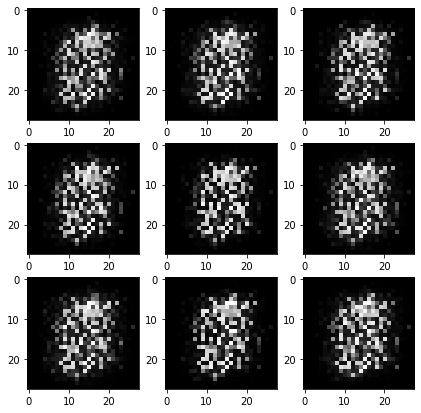

Epoch:55, Step:0, D-Loss:0.746, D-Acc:19.000, G-Loss:0.684
Epoch:55, Step:50, D-Loss:0.678, D-Acc:63.000, G-Loss:0.738
Epoch:55, Step:100, D-Loss:0.728, D-Acc:33.000, G-Loss:0.699
Epoch:55, Step:150, D-Loss:0.697, D-Acc:54.000, G-Loss:0.728
Epoch:55, Step:200, D-Loss:0.691, D-Acc:55.000, G-Loss:0.738
Epoch:55, Step:250, D-Loss:0.653, D-Acc:70.000, G-Loss:0.735
Epoch:55, Step:300, D-Loss:0.711, D-Acc:41.000, G-Loss:0.695
Epoch:55, Step:350, D-Loss:0.704, D-Acc:44.000, G-Loss:0.699
Epoch:55, Step:400, D-Loss:0.700, D-Acc:40.000, G-Loss:0.700
Epoch:55, Step:450, D-Loss:0.687, D-Acc:66.000, G-Loss:0.746
Epoch:56, Step:0, D-Loss:0.673, D-Acc:64.000, G-Loss:0.725
Epoch:56, Step:50, D-Loss:0.683, D-Acc:60.000, G-Loss:0.725
Epoch:56, Step:100, D-Loss:0.722, D-Acc:30.000, G-Loss:0.699
Epoch:56, Step:150, D-Loss:0.738, D-Acc:20.000, G-Loss:0.703
Epoch:56, Step:200, D-Loss:0.685, D-Acc:63.000, G-Loss:0.745
Epoch:56, Step:250, D-Loss:0.720, D-Acc:45.000, G-Loss:0.739
Epoch:56, Step:300, D-Loss:0.6

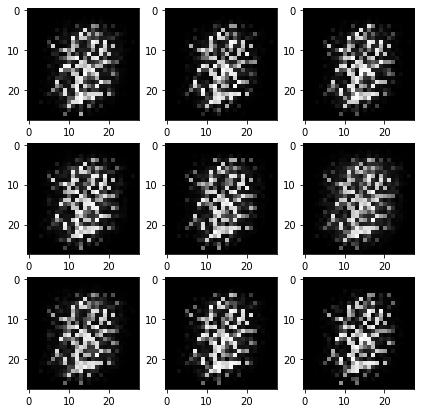

Epoch:60, Step:0, D-Loss:0.706, D-Acc:48.000, G-Loss:0.730
Epoch:60, Step:50, D-Loss:0.696, D-Acc:49.000, G-Loss:0.719
Epoch:60, Step:100, D-Loss:0.686, D-Acc:53.000, G-Loss:0.729
Epoch:60, Step:150, D-Loss:0.691, D-Acc:60.000, G-Loss:0.728
Epoch:60, Step:200, D-Loss:0.690, D-Acc:54.000, G-Loss:0.721
Epoch:60, Step:250, D-Loss:0.673, D-Acc:72.000, G-Loss:0.758
Epoch:60, Step:300, D-Loss:0.701, D-Acc:36.000, G-Loss:0.701
Epoch:60, Step:350, D-Loss:0.719, D-Acc:29.000, G-Loss:0.689
Epoch:60, Step:400, D-Loss:0.736, D-Acc:30.000, G-Loss:0.707
Epoch:60, Step:450, D-Loss:0.694, D-Acc:60.000, G-Loss:0.738
Epoch:61, Step:0, D-Loss:0.719, D-Acc:37.000, G-Loss:0.698
Epoch:61, Step:50, D-Loss:0.687, D-Acc:67.000, G-Loss:0.752
Epoch:61, Step:100, D-Loss:0.669, D-Acc:67.000, G-Loss:0.755
Epoch:61, Step:150, D-Loss:0.647, D-Acc:83.000, G-Loss:0.755
Epoch:61, Step:200, D-Loss:0.709, D-Acc:39.000, G-Loss:0.696
Epoch:61, Step:250, D-Loss:0.752, D-Acc:30.000, G-Loss:0.683
Epoch:61, Step:300, D-Loss:0.7

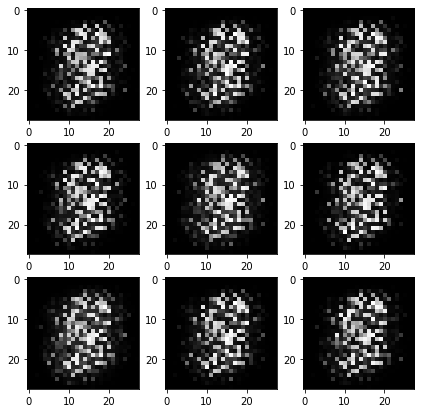

Epoch:65, Step:0, D-Loss:0.700, D-Acc:51.000, G-Loss:0.714
Epoch:65, Step:50, D-Loss:0.632, D-Acc:86.000, G-Loss:0.787
Epoch:65, Step:100, D-Loss:0.648, D-Acc:81.000, G-Loss:0.747
Epoch:65, Step:150, D-Loss:0.716, D-Acc:29.000, G-Loss:0.689
Epoch:65, Step:200, D-Loss:0.751, D-Acc:23.000, G-Loss:0.682
Epoch:65, Step:250, D-Loss:0.739, D-Acc:25.000, G-Loss:0.690
Epoch:65, Step:300, D-Loss:0.713, D-Acc:54.000, G-Loss:0.740
Epoch:65, Step:350, D-Loss:0.677, D-Acc:61.000, G-Loss:0.732
Epoch:65, Step:400, D-Loss:0.683, D-Acc:72.000, G-Loss:0.748
Epoch:65, Step:450, D-Loss:0.686, D-Acc:48.000, G-Loss:0.713
Epoch:66, Step:0, D-Loss:0.728, D-Acc:28.000, G-Loss:0.701
Epoch:66, Step:50, D-Loss:0.719, D-Acc:26.000, G-Loss:0.686
Epoch:66, Step:100, D-Loss:0.693, D-Acc:46.000, G-Loss:0.697
Epoch:66, Step:150, D-Loss:0.704, D-Acc:52.000, G-Loss:0.709
Epoch:66, Step:200, D-Loss:0.688, D-Acc:64.000, G-Loss:0.741
Epoch:66, Step:250, D-Loss:0.692, D-Acc:64.000, G-Loss:0.749
Epoch:66, Step:300, D-Loss:0.7

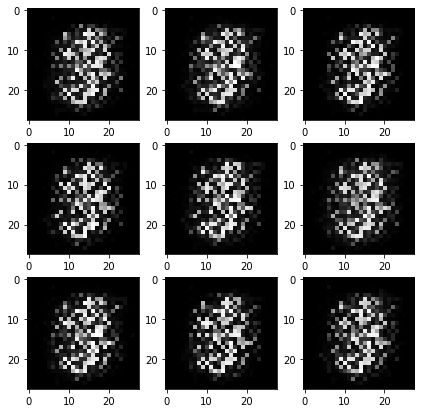

Epoch:70, Step:0, D-Loss:0.662, D-Acc:71.000, G-Loss:0.727
Epoch:70, Step:50, D-Loss:0.677, D-Acc:63.000, G-Loss:0.727
Epoch:70, Step:100, D-Loss:0.697, D-Acc:48.000, G-Loss:0.695
Epoch:70, Step:150, D-Loss:0.741, D-Acc:23.000, G-Loss:0.640
Epoch:70, Step:200, D-Loss:0.723, D-Acc:33.000, G-Loss:0.706
Epoch:70, Step:250, D-Loss:0.667, D-Acc:78.000, G-Loss:0.756
Epoch:70, Step:300, D-Loss:0.665, D-Acc:72.000, G-Loss:0.772
Epoch:70, Step:350, D-Loss:0.685, D-Acc:64.000, G-Loss:0.726
Epoch:70, Step:400, D-Loss:0.706, D-Acc:31.000, G-Loss:0.688
Epoch:70, Step:450, D-Loss:0.712, D-Acc:37.000, G-Loss:0.694
Epoch:71, Step:0, D-Loss:0.703, D-Acc:54.000, G-Loss:0.710
Epoch:71, Step:50, D-Loss:0.698, D-Acc:49.000, G-Loss:0.703
Epoch:71, Step:100, D-Loss:0.696, D-Acc:54.000, G-Loss:0.711
Epoch:71, Step:150, D-Loss:0.723, D-Acc:28.000, G-Loss:0.688
Epoch:71, Step:200, D-Loss:0.746, D-Acc:19.000, G-Loss:0.678
Epoch:71, Step:250, D-Loss:0.695, D-Acc:61.000, G-Loss:0.749
Epoch:71, Step:300, D-Loss:0.6

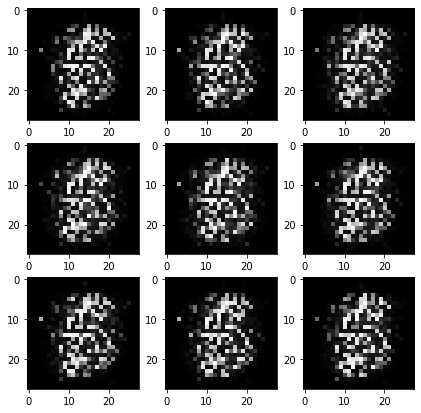

Epoch:75, Step:0, D-Loss:0.667, D-Acc:63.000, G-Loss:0.726
Epoch:75, Step:50, D-Loss:0.702, D-Acc:43.000, G-Loss:0.708
Epoch:75, Step:100, D-Loss:0.706, D-Acc:42.000, G-Loss:0.705
Epoch:75, Step:150, D-Loss:0.702, D-Acc:43.000, G-Loss:0.708
Epoch:75, Step:200, D-Loss:0.713, D-Acc:48.000, G-Loss:0.725
Epoch:75, Step:250, D-Loss:0.711, D-Acc:52.000, G-Loss:0.724
Epoch:75, Step:300, D-Loss:0.704, D-Acc:39.000, G-Loss:0.711
Epoch:75, Step:350, D-Loss:0.673, D-Acc:71.000, G-Loss:0.728
Epoch:75, Step:400, D-Loss:0.677, D-Acc:65.000, G-Loss:0.730
Epoch:75, Step:450, D-Loss:0.687, D-Acc:46.000, G-Loss:0.705
Epoch:76, Step:0, D-Loss:0.701, D-Acc:36.000, G-Loss:0.685
Epoch:76, Step:50, D-Loss:0.687, D-Acc:51.000, G-Loss:0.707
Epoch:76, Step:100, D-Loss:0.706, D-Acc:44.000, G-Loss:0.705
Epoch:76, Step:150, D-Loss:0.719, D-Acc:30.000, G-Loss:0.680
Epoch:76, Step:200, D-Loss:0.734, D-Acc:37.000, G-Loss:0.715
Epoch:76, Step:250, D-Loss:0.672, D-Acc:75.000, G-Loss:0.762
Epoch:76, Step:300, D-Loss:0.6

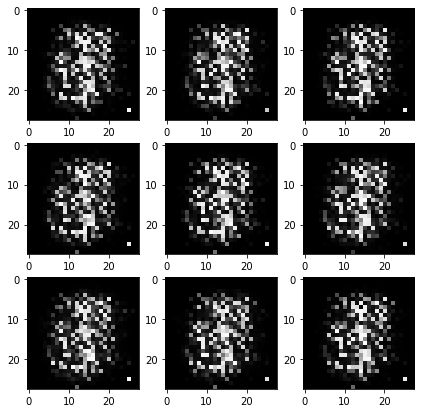

Epoch:80, Step:0, D-Loss:0.669, D-Acc:70.000, G-Loss:0.733
Epoch:80, Step:50, D-Loss:0.695, D-Acc:38.000, G-Loss:0.684
Epoch:80, Step:100, D-Loss:0.733, D-Acc:26.000, G-Loss:0.681
Epoch:80, Step:150, D-Loss:0.706, D-Acc:41.000, G-Loss:0.710
Epoch:80, Step:200, D-Loss:0.680, D-Acc:76.000, G-Loss:0.738
Epoch:80, Step:250, D-Loss:0.628, D-Acc:80.000, G-Loss:0.825
Epoch:80, Step:300, D-Loss:0.711, D-Acc:35.000, G-Loss:0.703
Epoch:80, Step:350, D-Loss:0.742, D-Acc:21.000, G-Loss:0.676
Epoch:80, Step:400, D-Loss:0.727, D-Acc:39.000, G-Loss:0.707
Epoch:80, Step:450, D-Loss:0.696, D-Acc:56.000, G-Loss:0.723
Epoch:81, Step:0, D-Loss:0.709, D-Acc:37.000, G-Loss:0.705
Epoch:81, Step:50, D-Loss:0.695, D-Acc:46.000, G-Loss:0.712
Epoch:81, Step:100, D-Loss:0.680, D-Acc:70.000, G-Loss:0.729
Epoch:81, Step:150, D-Loss:0.693, D-Acc:50.000, G-Loss:0.700
Epoch:81, Step:200, D-Loss:0.682, D-Acc:50.000, G-Loss:0.705
Epoch:81, Step:250, D-Loss:0.693, D-Acc:39.000, G-Loss:0.693
Epoch:81, Step:300, D-Loss:0.7

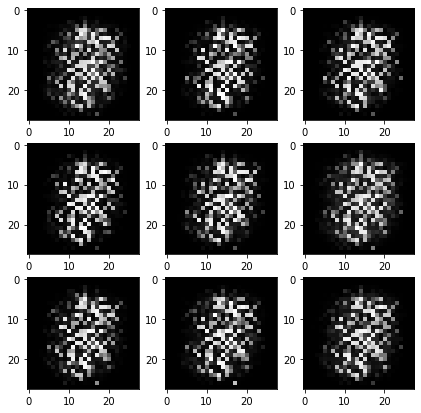

Epoch:85, Step:0, D-Loss:0.674, D-Acc:75.000, G-Loss:0.733
Epoch:85, Step:50, D-Loss:0.678, D-Acc:51.000, G-Loss:0.694
Epoch:85, Step:100, D-Loss:0.676, D-Acc:67.000, G-Loss:0.712
Epoch:85, Step:150, D-Loss:0.670, D-Acc:59.000, G-Loss:0.716
Epoch:85, Step:200, D-Loss:0.712, D-Acc:31.000, G-Loss:0.656
Epoch:85, Step:250, D-Loss:0.757, D-Acc:16.000, G-Loss:0.648
Epoch:85, Step:300, D-Loss:0.694, D-Acc:67.000, G-Loss:0.751
Epoch:85, Step:350, D-Loss:0.711, D-Acc:52.000, G-Loss:0.728
Epoch:85, Step:400, D-Loss:0.670, D-Acc:75.000, G-Loss:0.768
Epoch:85, Step:450, D-Loss:0.641, D-Acc:87.000, G-Loss:0.776
Epoch:86, Step:0, D-Loss:0.689, D-Acc:50.000, G-Loss:0.714
Epoch:86, Step:50, D-Loss:0.720, D-Acc:30.000, G-Loss:0.685
Epoch:86, Step:100, D-Loss:0.731, D-Acc:22.000, G-Loss:0.657
Epoch:86, Step:150, D-Loss:0.688, D-Acc:68.000, G-Loss:0.737
Epoch:86, Step:200, D-Loss:0.672, D-Acc:71.000, G-Loss:0.755
Epoch:86, Step:250, D-Loss:0.683, D-Acc:57.000, G-Loss:0.721
Epoch:86, Step:300, D-Loss:0.6

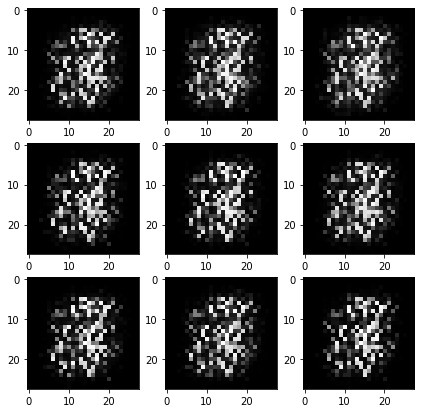

Epoch:90, Step:0, D-Loss:0.720, D-Acc:32.000, G-Loss:0.671
Epoch:90, Step:50, D-Loss:0.736, D-Acc:23.000, G-Loss:0.671
Epoch:90, Step:100, D-Loss:0.702, D-Acc:34.000, G-Loss:0.687
Epoch:90, Step:150, D-Loss:0.688, D-Acc:61.000, G-Loss:0.721
Epoch:90, Step:200, D-Loss:0.667, D-Acc:76.000, G-Loss:0.759
Epoch:90, Step:250, D-Loss:0.688, D-Acc:47.000, G-Loss:0.707
Epoch:90, Step:300, D-Loss:0.716, D-Acc:19.000, G-Loss:0.678
Epoch:90, Step:350, D-Loss:0.733, D-Acc:14.000, G-Loss:0.659
Epoch:90, Step:400, D-Loss:0.711, D-Acc:55.000, G-Loss:0.725
Epoch:90, Step:450, D-Loss:0.673, D-Acc:70.000, G-Loss:0.785
Epoch:91, Step:0, D-Loss:0.646, D-Acc:84.000, G-Loss:0.788
Epoch:91, Step:50, D-Loss:0.707, D-Acc:31.000, G-Loss:0.678
Epoch:91, Step:100, D-Loss:0.719, D-Acc:24.000, G-Loss:0.689
Epoch:91, Step:150, D-Loss:0.714, D-Acc:35.000, G-Loss:0.699
Epoch:91, Step:200, D-Loss:0.711, D-Acc:51.000, G-Loss:0.727
Epoch:91, Step:250, D-Loss:0.701, D-Acc:51.000, G-Loss:0.725
Epoch:91, Step:300, D-Loss:0.6

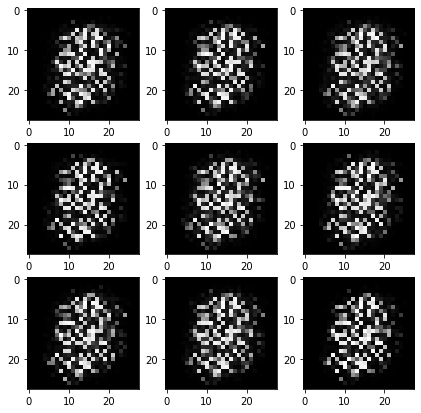

Epoch:95, Step:0, D-Loss:0.699, D-Acc:64.000, G-Loss:0.750
Epoch:95, Step:50, D-Loss:0.637, D-Acc:79.000, G-Loss:0.821
Epoch:95, Step:100, D-Loss:0.648, D-Acc:89.000, G-Loss:0.750
Epoch:95, Step:150, D-Loss:0.674, D-Acc:49.000, G-Loss:0.716
Epoch:95, Step:200, D-Loss:0.721, D-Acc:28.000, G-Loss:0.648
Epoch:95, Step:250, D-Loss:0.705, D-Acc:36.000, G-Loss:0.697
Epoch:95, Step:300, D-Loss:0.717, D-Acc:27.000, G-Loss:0.658
Epoch:95, Step:350, D-Loss:0.699, D-Acc:43.000, G-Loss:0.704
Epoch:95, Step:400, D-Loss:0.708, D-Acc:29.000, G-Loss:0.676
Epoch:95, Step:450, D-Loss:0.708, D-Acc:33.000, G-Loss:0.692
Epoch:96, Step:0, D-Loss:0.695, D-Acc:67.000, G-Loss:0.733
Epoch:96, Step:50, D-Loss:0.652, D-Acc:83.000, G-Loss:0.771
Epoch:96, Step:100, D-Loss:0.690, D-Acc:49.000, G-Loss:0.716
Epoch:96, Step:150, D-Loss:0.729, D-Acc:27.000, G-Loss:0.684
Epoch:96, Step:200, D-Loss:0.705, D-Acc:57.000, G-Loss:0.719
Epoch:96, Step:250, D-Loss:0.691, D-Acc:59.000, G-Loss:0.724
Epoch:96, Step:300, D-Loss:0.6

In [14]:
epochs = 100
batch_size = 100
steps = 500
noise_size = 50

losses_d = []
losses_g = []

for i in range(0, epochs):
    hist_d = []
    hist_g = []
    if (i%5 == 0):
        show_generator_results(generator_network)
    for j in range(steps):
        fake_samples = get_fake_samples(generator_network, batch_size//2, noise_size)
        real_samples = get_real_samples(batch_size=batch_size//2)

        fake_y = np.zeros((batch_size//2, 1))
        real_y = np.ones((batch_size//2, 1))
        
        input_batch = np.vstack((fake_samples, real_samples))
        output_labels = np.vstack((fake_y, real_y))
        
        # Updating Discriminator weights
        discriminator_network.trainable=True
        loss_d = discriminator_network.train_on_batch(input_batch, output_labels)
        
        gan_input = get_random_noise(batch_size, noise_size)
        
        # Make the Discriminator belive that these are real samples and calculate loss to train the generator
        gan_output = np.ones((batch_size))
        
        # Updating Generator weights
        discriminator_network.trainable=False
        loss_g = gan_model.train_on_batch(gan_input, gan_output)
        
        hist_d.append(loss_d[0])
        hist_g.append(loss_g)
        
        if j%50 == 0:
            print ("Epoch:%.0f, Step:%.0f, D-Loss:%.3f, D-Acc:%.3f, G-Loss:%.3f"%(i,j,loss_d[0],loss_d[1]*100,loss_g))
            
    losses_d.append(np.mean(hist_d))
    losses_g.append(np.mean(hist_g))

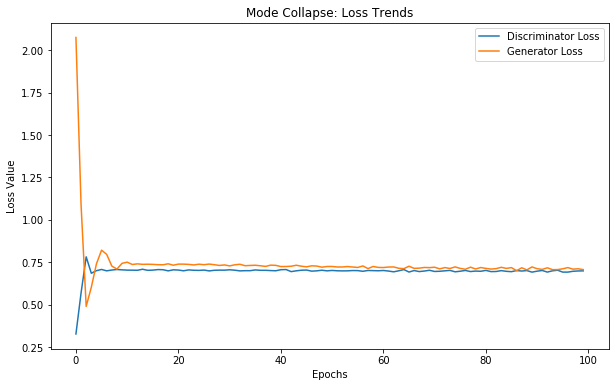

In [18]:
epochs = [i for i in range(len(losses_d))]
plt.figure(figsize=(10, 6))
plt.plot(losses_d)
plt.plot(losses_g)
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.title("Mode Collapse: Loss Trends")
plt.legend(['Discriminator Loss', 'Generator Loss'])
plt.show()